In [148]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [149]:
data = tf.keras.utils.image_dataset_from_directory('../new_direction/Dataset/cell_images/cell_images',image_size=(25,25))

Found 27558 files belonging to 2 classes.


In [150]:
data_iterator = data.as_numpy_iterator()

In [151]:
batch = data_iterator.next()

In [152]:
batch[0].shape

(32, 25, 25, 3)

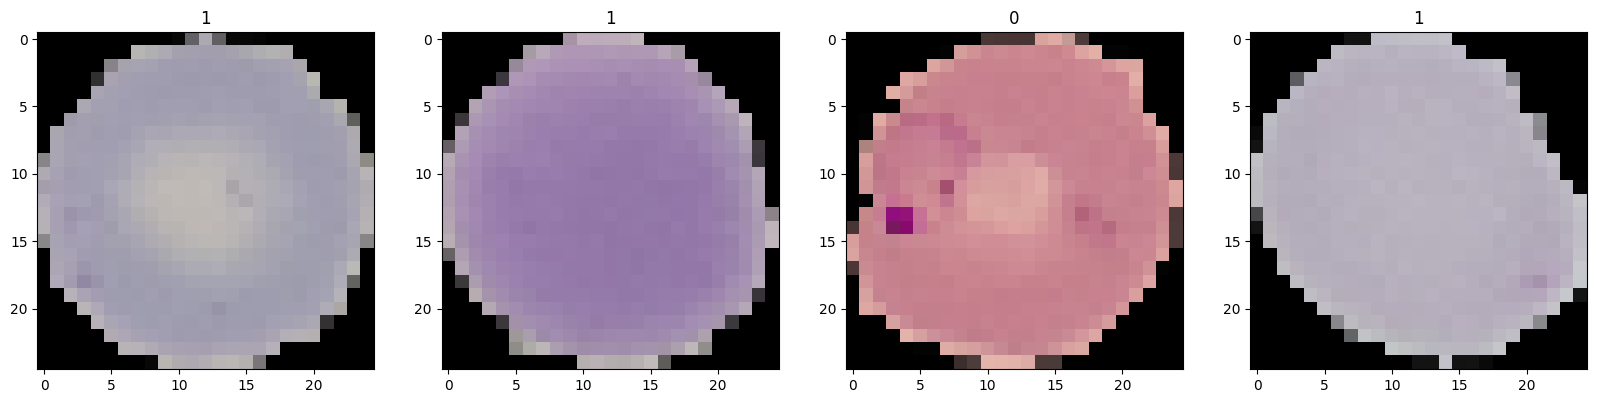

In [153]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#1 - uninfected
#0 - infected

In [154]:
data = data.map(lambda x,y: (x/255, y))

In [155]:
len(data)

862

In [169]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [170]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [171]:
train_size

603

In [172]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [174]:
model = Sequential()

In [175]:
from tensorflow.keras.regularizers import l2
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(25,25,3), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [176]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [177]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 23, 23, 16)        448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 11, 11, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 9, 9, 32)          4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 4, 4, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 2, 2, 16)          4624      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 1, 1, 16)         

# 7. Train

In [178]:
logdir='logs'

In [179]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [180]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
603/603 [==============================] - 10s 17ms/step - loss: 0.5992 - accuracy: 0.6883 - val_loss: 0.4891 - val_accuracy: 0.7798
Epoch 2/20
603/603 [==============================] - 10s 17ms/step - loss: 0.3945 - accuracy: 0.8328 - val_loss: 0.3291 - val_accuracy: 0.8657
Epoch 3/20
603/603 [==============================] - 10s 17ms/step - loss: 0.2942 - accuracy: 0.8883 - val_loss: 0.2774 - val_accuracy: 0.8957
Epoch 4/20
603/603 [==============================] - 10s 16ms/step - loss: 0.2529 - accuracy: 0.9088 - val_loss: 0.2466 - val_accuracy: 0.9110
Epoch 5/20
603/603 [==============================] - 10s 17ms/step - loss: 0.2249 - accuracy: 0.9231 - val_loss: 0.2327 - val_accuracy: 0.9182
Epoch 6/20
603/603 [==============================] - 10s 16ms/step - loss: 0.2139 - accuracy: 0.9273 - val_loss: 0.2173 - val_accuracy: 0.9221
Epoch 7/20
603/603 [==============================] - 10s 17ms/step - loss: 0.1973 - accuracy: 0.9350 - val_loss: 0.2133 - val_accuracy:

# 8. Plot Performance

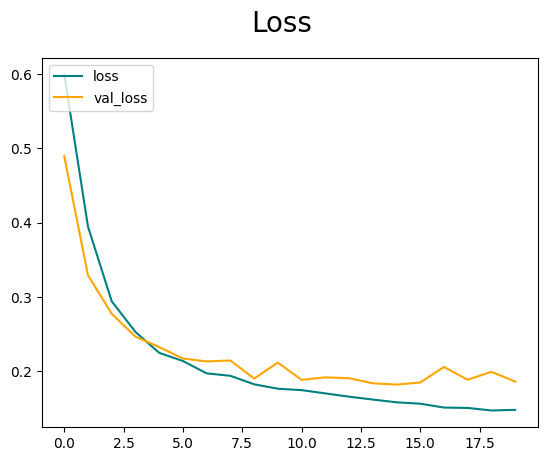

In [181]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

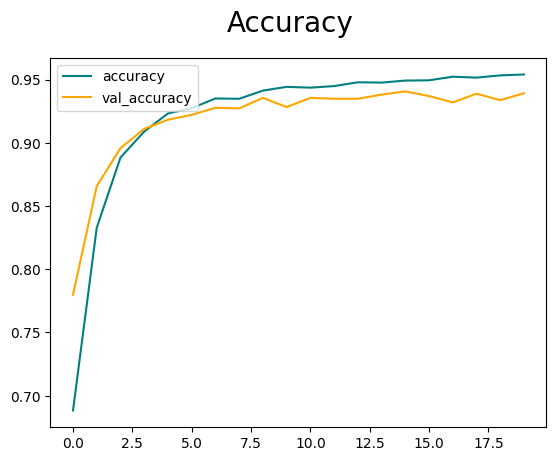

In [182]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 12ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.92199576, shape=(), dtype=float32) tf.Tensor(0.9432063, shape=(), dtype=float32) tf.Tensor(0.9309593, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

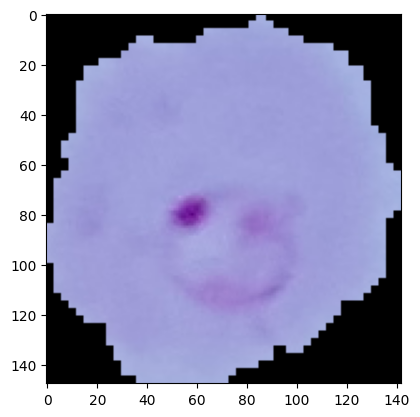

In [ ]:
img = cv2.imread('../new_direction/Dataset/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')
plt.imshow(img)
plt.show()

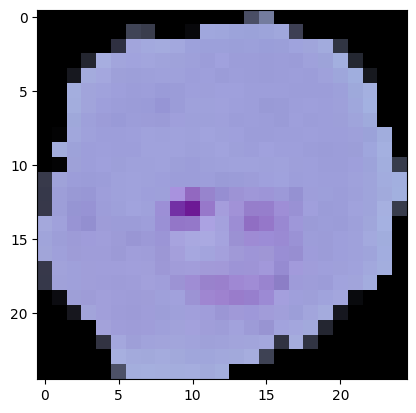

In [ ]:
resize = tf.image.resize(img, (25,25))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
predict_value = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [ ]:
predict_value

array([[0.0001447]], dtype=float32)

In [ ]:
if predict_value > 0.5: 
    print(f'Predicted class is uninfected')
else:
    print(f'Predicted class is Infected')

Predicted class is Infected


In [ ]:
"../new_direction/"

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
save_path = model.save(os.path.join('new_direction','imageclassifier.h5'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(save_path)

None
